In [ ]:
## ASSIGNMENT 5

In [ ]:
import pandas as pd
data = pd.read_csv('sales_data_sample.csv', sep = ',', encoding = 'Latin-1')

In [ ]:
data.shape

(2823, 25)

In [ ]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
# selecting numeric data for clustering
numeric_data = data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

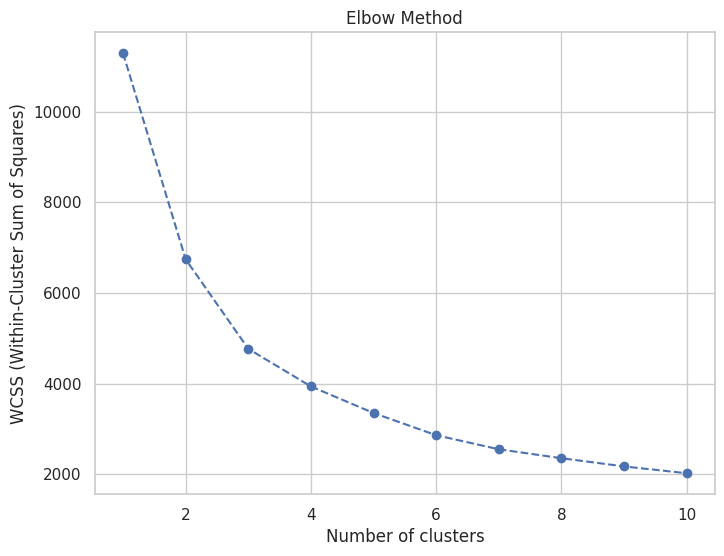

In [ ]:
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
# Based on the Elbow Method plot, let's choose the optimal K value
optimal_k = 3

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
data['Cluster'] = clusters

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']))

Cluster Centers:
   QUANTITYORDERED  PRICEEACH        SALES        MSRP
0        35.208205  59.551169  2101.076482   64.145641
1        27.597390  95.435090  3123.062801  113.266064
2        43.723005  97.479261  5720.080669  127.893192


In [ ]:
cluster_counts = data['Cluster'].value_counts().sort_index()

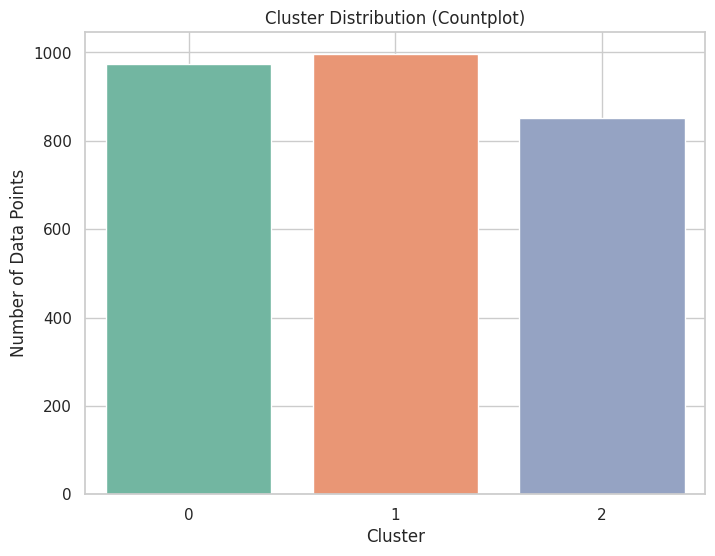

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Cluster', palette='Set2')
plt.title('Cluster Distribution (Countplot)')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.grid(True)
plt.show()

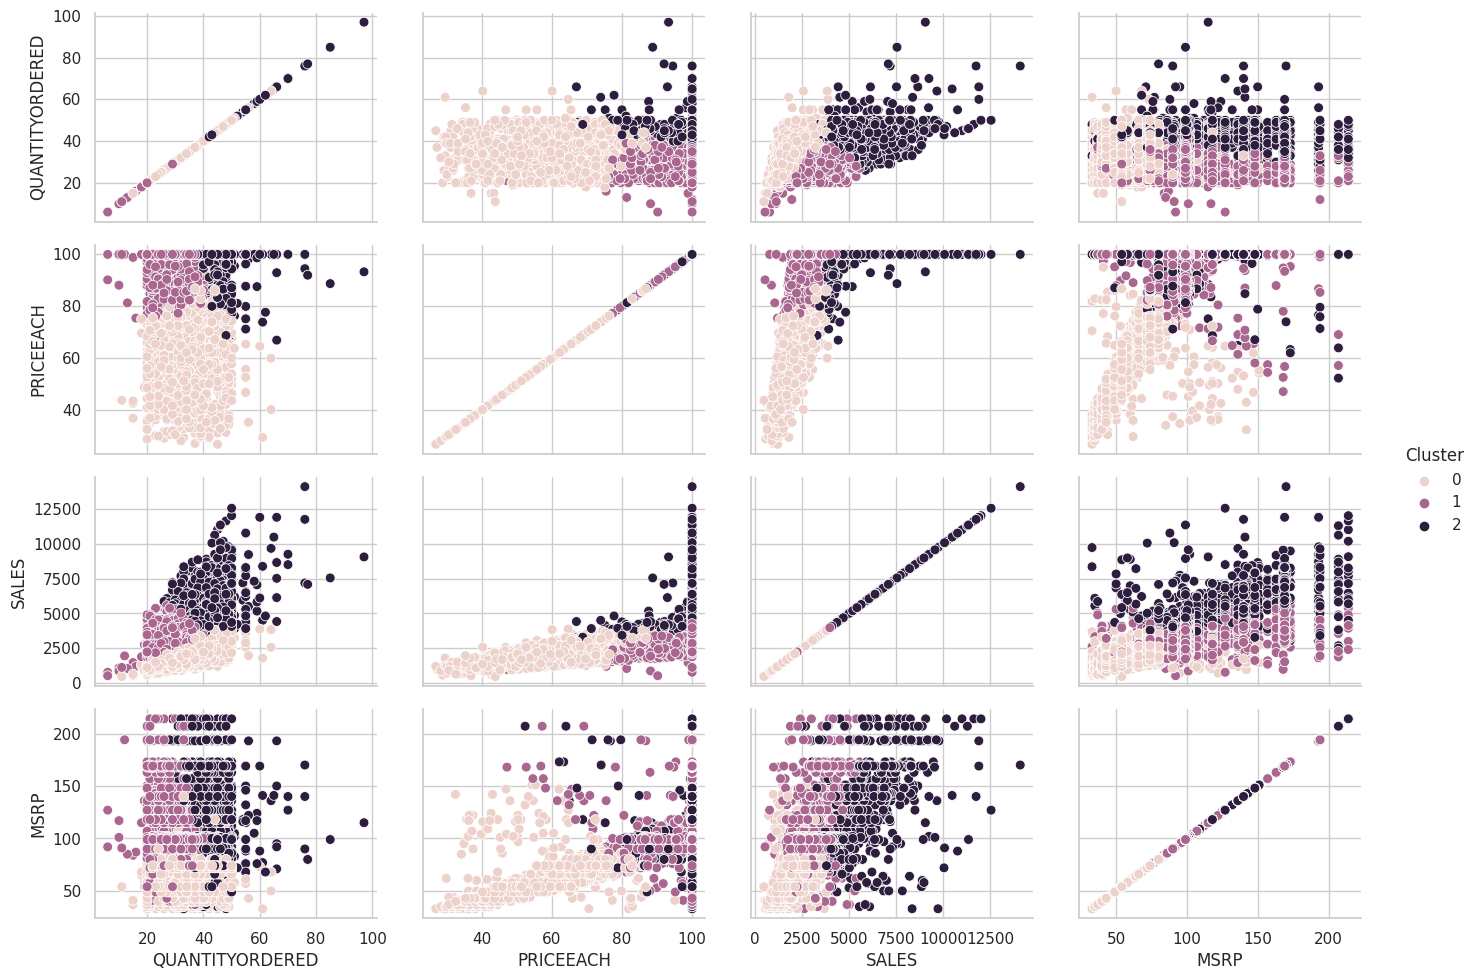

In [ ]:
data_with_clusters = pd.concat([data[['Cluster']], numeric_data], axis=1)

sns.set(style="whitegrid")
g = sns.PairGrid(data_with_clusters, hue="Cluster")
g.map(sns.scatterplot, s=50)
g.add_legend(title="Cluster")

g.fig.set_size_inches(15, 10)

plt.show()